# Εισαγωγή και επισκόπηση

Το παρόν dataset αφορά στην ταξινόμηση δύο πνευματικών καταστάσεων μέσω EEG σημάτων : την κατάσταση Planning (κατά τη διάρκεια φαντασίας) και την κατάσταση Relax (χαλάρωσης). Αρχικά, εισάγουμε το dataset στο notebook μας και ξεκινάμε την μελέτη του.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../dataset/plrx.txt', delimiter = "\t", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.17936,-0.207000,-0.209710,-0.097260,-0.119210,-0.173220,-0.280760,0.223170,0.418660,-0.032886,0.003383,-0.334250,1.0,NaN
1,-0.14659,-0.164940,0.249870,-0.073985,0.494940,-0.156330,-0.288910,0.500800,-0.045553,0.050759,-0.017511,0.066959,1.0,NaN
2,-0.13131,0.518160,0.432810,0.397890,0.043127,0.563200,-0.013246,-0.062833,-0.883390,-0.040303,0.088057,0.631200,2.0,NaN
3,0.64940,0.418780,0.148350,0.333490,-0.219740,0.398910,0.590650,0.077100,-1.107200,-0.367230,0.364680,0.571720,1.0,NaN
4,-0.40628,0.115030,0.073336,0.070066,-0.030920,0.152050,-0.191420,-0.580430,-0.102250,0.153750,-0.126950,0.184570,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-0.55005,0.276290,-0.273240,0.113190,-0.776980,0.522660,-0.850620,0.440040,0.203910,-0.014462,0.002273,-0.100480,2.0,NaN
178,-0.78399,0.254600,-0.700990,-0.299170,-0.858330,0.210500,-0.530050,0.518550,-0.303190,0.020018,-0.020915,0.663940,1.0,NaN
179,0.29877,-0.179620,0.032859,-0.899010,0.540300,-0.361840,0.177900,0.713250,-0.098148,-0.411130,0.246830,-0.389160,2.0,NaN
180,-0.37812,-0.522870,0.215410,-0.243590,0.637840,-0.492210,-0.506930,-0.258110,-0.328990,-0.039117,0.007591,0.476030,1.0,NaN


In [4]:
df.shape
#τα δείγματα (instances) είναι οι γραμμές και τα χαρακτηριστικά (attributes) οι στήλες
#χρειάστηκε το header=None για να μην παίρνει ως επικεφαλίδα την πρώτη γραμμή

#λόγω space στο txt έχει μια έξτρα στήλη NaN που πρέπει να διορθωθεί.
#df.shape -> διαστάσεις dataframe

(182, 14)

In [5]:
print('Number of NaN values for each feature:\n', df.isnull().sum()) 

Number of NaN values for each feature:
 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13    182
dtype: int64


Παρατηρούμε πως στην τελευταία κολόνα λείπουν όλες οι τιμές, καθιστώντας την άχρηστη στην μελέτη του dataset, οπότε και την αφαιρούμε.

In [6]:
df.drop(13, axis=1, inplace=True)
#axis=1 όταν πρόκεται για κολόνα, inplace=True για να κάνει την αλλαγή και όχι μόνο να μας δείξει πως θα ήταν

df.shape

(182, 13)

Το παρόν dataset αποτελεί ένα binary dataset , καθώς οι κλάσεις μας αναπαραστώνται με τις τιμές 1 και 2. 

In [7]:
df[12].unique()

array([1., 2.])

In [8]:
df[12].value_counts()[1.0]

130

Με την παραπάνω εντολή μετράμε στην 13η κολόνα πόσες 1.0 τιμές υπάρχουν, άρα 130->1.0 και 52->2.0 συνεπώς, πρόκεται για μη ισορροπημένο dataset.

## Train - Test Split 

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(12,axis=1)
y = df[12]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=7)
#το random_state αν ορίσουμε έναν int τότε βγάζει κάθε φορά το ίδιο αποτέλεσμα

Παρακάτω βλέπουμε ότι δεν έχουμε διαφορετικούς τύπους στο dataset, μη κατηγορικά features, ενώ τα χαρακτηριστικά μας είναι όλα αριθμητικά και δεν συναντόνται διατεταγμένα χαρακτηριστικά. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       182 non-null    float64
 1   1       182 non-null    float64
 2   2       182 non-null    float64
 3   3       182 non-null    float64
 4   4       182 non-null    float64
 5   5       182 non-null    float64
 6   6       182 non-null    float64
 7   7       182 non-null    float64
 8   8       182 non-null    float64
 9   9       182 non-null    float64
 10  10      182 non-null    float64
 11  11      182 non-null    float64
 12  12      182 non-null    float64
dtypes: float64(13)
memory usage: 18.6 KB


## Μετρικές 

Οι μετρικές με τις οποίες θα γίνει η βελτιστοποίηση και η παρουσίαση των αποτελεσμάτων θα γίνει κάθε φορά ξεχωριστά για δύο μετρικές : την ορθότητα Accuracy και F-1 score.

# Ταξινόμηση 

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Για τον ταξινομητή Dummy

In [12]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

In [13]:
y_pred = dummy.predict(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

In [14]:
f1_score(y_test, y_pred, average='binary')

0.8421052631578948

### Για την μέθοδο Gaussian Naive Bayes (GNB)

In [15]:
from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = NBModel.predict(X_test)
accuracy_score(y_test, y_pred)

0.5636363636363636

In [17]:
f1_score(y_test, y_pred, average='binary')

0.7

### Για το KNN model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.6545454545454545

In [20]:
f1_score(y_test, y_pred, average='binary')

0.7912087912087913

### Για το LR

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7090909090909091

In [23]:
f1_score(y_test, y_pred, average='binary')

0.8297872340425532

## Σχήμα διασταυρούμενης επικύρωσης

In [24]:
from sklearn.model_selection import cross_validate
scores_dummy = cross_validate(dummy, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_dummy

{'fit_time': array([0.00241399, 0.00058794, 0.00072074, 0.00148201, 0.00059295,
        0.0004952 , 0.00048423, 0.00053501, 0.00052309, 0.00045013]),
 'score_time': array([0.00259781, 0.00178909, 0.0015521 , 0.00218892, 0.00159478,
        0.00128412, 0.00127673, 0.00137496, 0.00117087, 0.00113106]),
 'test_accuracy': array([0.69230769, 0.69230769, 0.69230769, 0.69230769, 0.69230769,
        0.69230769, 0.69230769, 0.75      , 0.75      , 0.75      ]),
 'test_f1': array([0.81818182, 0.81818182, 0.81818182, 0.81818182, 0.81818182,
        0.81818182, 0.81818182, 0.85714286, 0.85714286, 0.85714286])}

In [25]:
scores_nb = cross_validate(NBModel, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_nb

{'fit_time': array([0.00294805, 0.00224495, 0.00191736, 0.00194287, 0.00180721,
        0.00197315, 0.00169396, 0.00233197, 0.00199175, 0.00159431]),
 'score_time': array([0.00290704, 0.00252104, 0.00224376, 0.00353098, 0.00255585,
        0.00243497, 0.00210404, 0.00307512, 0.00215006, 0.00210381]),
 'test_accuracy': array([0.69230769, 0.76923077, 0.53846154, 0.69230769, 0.38461538,
        0.69230769, 0.61538462, 0.75      , 0.66666667, 0.58333333]),
 'test_f1': array([0.77777778, 0.84210526, 0.7       , 0.81818182, 0.55555556,
        0.8       , 0.76190476, 0.84210526, 0.77777778, 0.73684211])}

In [26]:
scores_neigh = cross_validate(neigh, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_neigh

{'fit_time': array([0.00234389, 0.00195503, 0.00183487, 0.00170612, 0.00153995,
        0.00204206, 0.0016892 , 0.00154519, 0.00212026, 0.00174308]),
 'score_time': array([0.00389504, 0.00377798, 0.00343609, 0.00282693, 0.00288391,
        0.00390291, 0.002985  , 0.00280881, 0.00367379, 0.003227  ]),
 'test_accuracy': array([0.61538462, 0.53846154, 0.53846154, 0.61538462, 0.53846154,
        0.61538462, 0.53846154, 0.58333333, 0.5       , 0.75      ]),
 'test_f1': array([0.76190476, 0.7       , 0.7       , 0.76190476, 0.66666667,
        0.73684211, 0.66666667, 0.73684211, 0.66666667, 0.85714286])}

In [27]:
scores_lr = cross_validate(lr, X_train, y_train, cv=10, scoring=['accuracy','f1'])
scores_lr

{'fit_time': array([0.0060029 , 0.00498509, 0.00497794, 0.00385499, 0.00428295,
        0.00453782, 0.00473213, 0.00420189, 0.00488901, 0.00471401]),
 'score_time': array([0.00265503, 0.00302887, 0.00231004, 0.00277209, 0.00238991,
        0.00215125, 0.00269675, 0.00214505, 0.00245094, 0.00244093]),
 'test_accuracy': array([0.69230769, 0.69230769, 0.61538462, 0.69230769, 0.69230769,
        0.69230769, 0.61538462, 0.75      , 0.75      , 0.75      ]),
 'test_f1': array([0.81818182, 0.81818182, 0.76190476, 0.81818182, 0.81818182,
        0.81818182, 0.76190476, 0.85714286, 0.85714286, 0.85714286])}

## Επίδοση out-of-the-box

#### Πίνακας markdown

||Accuracy|F1-Score|
|---|--|----|
|**dummy**|0.7272|0.8421|
|**GNB**|0.5636|0.7|
|**KNN**|0.6545|0.7912|
|**LR**|0.7090|0.8397|

#### Bar plot σύγκρισης

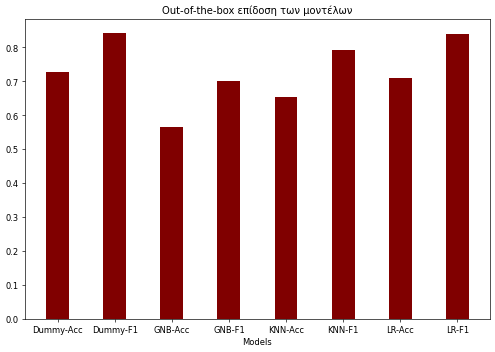

In [28]:
import matplotlib.pyplot as plt
data = {'Dummy-Acc':0.7272, 'Dummy-F1':0.8421, 'GNB-Acc':0.5636, 'GNB-F1':0.7, 'KNN-Acc':0.6545, 'KNN-F1':0.7912, 'LR-Acc':0.7090,'LR-F1':0.8397}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize =(10,6.5),dpi=60)

plt.bar(courses,values,color='maroon', width=.4)
plt.xlabel("Models")
plt.title("Out-of-the-box επίδοση των μοντέλων")
plt.show()

## Προεπεξεργασία δεδομένων 

Αρχικά θα εφαρμόσουμε την τεχνική της προεπεξεργασίας.  Το πρώτο βήμα είναι να εξασφαλίσουμε πως δεν απουσιάζουν δεδομένα, και πράγματι οπως έχουμε δει αυτό ήδη ισχύει (βλέπουμε πως δεν υπάρχουν NaN τιμές για καποιο από τα χαρακτηριστικά των δεδομένων μαςστο αντίστοιχο print).

Το επόμενο βήμα μας θα είναι η κανονικοποίηση των χαρακτηριστικων. Εδώ πρέπει να επιλέξουμε μεταξύ της μετατροπής σε standard score και της μετατροπής μεγίστου ελαχίστου. Θα χρησιμοποιησουμε μετατροπή σε standard score, καθώς γνωρίζουμε από την θεωρία ότι είναι καλύτερο για τους ταξινομητές.

In [29]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled.shape

(127, 12)

In [32]:
y_train.value_counts()

1.0    90
2.0    37
Name: 12, dtype: int64

Στην συνέχεια, προχωρήσαμε σε επιλογή χαρακτηριστικών (feature selection), προκειμένου να έχουμε τον βέλτιστο συνδυασμό features για την επαίδευση των μοντέλων.

In [33]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train_scaled, y_train)
selector.support_

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True])

In [34]:
features = pd.DataFrame()
features['selected'] = selector.support_
features

,selected
0,False
1,True
2,True
3,True
4,True
5,False
6,False
7,True
8,True
9,False


In [35]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled = X_train_scaled[[1,2,3,6,7,8,11]]

X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled = X_test_scaled[[1,2,3,6,7,8,11]]

In [36]:
X_train_scaled.shape

(127, 7)

In [37]:
# from sklearn.decomposition import PCA

# pca = PCA()

# pca = PCA(n_components=0.99)
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

# print(X_train_scaled.shape)
# print(X_test_scaled.shape)

### Ρύθμιση υπερπαραμέτρων στο KNN 

In [38]:
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = { 'n_neighbors' : list(range(1, 30)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits


In [39]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=23, weights='distance')

In [40]:
knn_tuned = grid_search.best_estimator_

y_pred = knn_tuned.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.7454545454545455

In [41]:
f1_score(y_pred, y_test)

0.851063829787234

### Ρύθμιση υπερπαραμέτρων στο GNB 

In [42]:
NBModel=GaussianNB()
    
parameters = {
    'var_smoothing': [1e-1,1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
gnb = GridSearchCV(NBModel, parameters, cv=10, verbose=20, n_jobs=-1)
gnb.fit(X_train_scaled, y_train)
gnb.best_estimator_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GaussianNB(var_smoothing=0.1)

In [44]:
gnb_tuned = gnb.best_estimator_

y_pred = gnb_tuned.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.6909090909090909

In [163]:
f1_score(y_pred, y_test)

0.8172043010752688

### Ρύθμιση υπερπαραμέτρων στο LR 